In [61]:
# Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy.spatial import cKDTree

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor

In [2]:
# Load datasets
train = pd.read_csv("data/Train.csv")
test = pd.read_csv("data/Test.csv")
toilets = pd.read_csv("data/toilets.csv")
waste_management = pd.read_csv("data/waste_management.csv")
water_sources = pd.read_csv("data/water_sources.csv")

## Explore the Data
 - We shall look at the data and try to understand the data
    - We shall look at the distribution of the target variable
    - We shall look at the distribution of the features
    - We shall look at the correlation between the features
    - We shall look at the missing values in the data
    - we look at the different datasets provided
     - toilets
     - waste management
     - water sources
     - train
     - test

In [5]:
# toilets shape
toilets.shape

(10680, 43)

In [6]:
# toilets head
toilets.head()

,Year,Month,10u,10v,2d,2t,evabs,evaow,evatc,evavt,...,tp,swvl1,swvl2,swvl3,swvl4,Transformed_Latitude,Transformed_Longitude,Month_Year,lat_lon,Month_Year_lat_lon
0,2019,1,-1.006850,-0.714544,293.502,297.417,-0.002489,-0.001031,-0.000989,-3.445890e-08,...,0.006655,0.346542,0.335724,0.264359,0.300018,-8.61768,68.24536,1_2019,-8.61768_68.24536,1_2019_-8.61768_68.24536
1,2019,2,-1.408560,-0.662555,292.943,297.978,-0.002556,-0.001076,-0.000734,-3.818420e-08,...,0.003201,0.254517,0.259918,0.281769,0.296188,-8.61768,68.24536,2_2019,-8.61768_68.24536,2_2019_-8.61768_68.24536
2,2019,3,-0.892110,-0.449448,293.250,297.989,-0.002535,-0.000980,-0.000713,-3.678720e-08,...,0.004682,0.278152,0.284195,0.261597,0.291672,-8.61768,68.24536,3_2019,-8.61768_68.24536,3_2019_-8.61768_68.24536
3,2019,4,-0.392348,0.384925,293.934,296.542,-0.001748,-0.000658,-0.001343,-2.700840e-08,...,0.007518,0.385513,0.378616,0.309784,0.288925,-8.61768,68.24536,4_2019,-8.61768_68.24536,4_2019_-8.61768_68.24536
4,2019,5,-0.447104,0.581028,292.571,294.726,-0.001374,-0.000462,-0.001139,-2.048910e-08,...,0.005989,0.397659,0.400055,0.392654,0.309311,-8.61768,68.24536,5_2019,-8.61768_68.24536,5_2019_-8.61768_68.24536


In [7]:
#  toilets drop any duplicated and missing values
toilets = toilets.drop_duplicates()
toilets = toilets.dropna()

In [8]:
# describe toilets
toilets.describe()

,Year,Month,10u,10v,2d,2t,evabs,evaow,evatc,evavt,...,ssrd,strd,e,tp,swvl1,swvl2,swvl3,swvl4,Transformed_Latitude,Transformed_Longitude
count,10680.00000,10680.000000,10680.000000,10680.000000,10680.000000,10680.00000,10680.000000,10680.000000,10680.000000,1.068000e+04,...,1.068000e+04,1.068000e+04,10680.000000,10680.000000,10680.000000,10680.000000,10680.000000,10680.000000,10680.000000,10680.000000
mean,2021.00000,6.500000,-0.883593,0.164881,291.068738,296.24792,-0.001537,-0.000633,-0.000591,-1.002626e-05,...,1.716680e+07,2.990567e+07,-0.002771,0.003256,0.253805,0.264232,0.271608,0.297233,-8.601758,68.247897
std,1.41428,3.452214,0.467480,0.598086,2.476718,1.45429,0.000635,0.000283,0.000417,1.883289e-05,...,3.617339e+06,7.339367e+06,0.001134,0.003123,0.097400,0.087247,0.068554,0.046284,0.045444,0.033442
min,2019.00000,1.000000,-2.186940,-0.866400,286.144000,292.26100,-0.003307,-0.001376,-0.002149,-8.422280e-05,...,9.721450e+06,1.685050e+07,-0.004830,0.000176,0.109100,0.133270,0.146423,0.191055,-8.708540,68.168000
25%,2020.00000,3.750000,-1.232540,-0.408200,288.471000,295.09900,-0.002074,-0.000832,-0.000902,-2.468000e-07,...,1.391440e+07,1.864462e+07,-0.003749,0.000676,0.154800,0.181656,0.215134,0.263046,-8.627610,68.224370
50%,2021.00000,6.500000,-0.892110,0.218002,292.106000,296.42100,-0.001487,-0.000580,-0.000414,-3.073360e-08,...,1.763230e+07,3.337250e+07,-0.002589,0.002018,0.254517,0.270798,0.264359,0.296188,-8.614260,68.246670
75%,2022.00000,9.250000,-0.456618,0.666530,293.181000,297.36000,-0.001005,-0.000416,-0.000238,-1.839360e-08,...,2.002040e+07,3.543040e+07,-0.001804,0.005264,0.339630,0.338516,0.317154,0.321014,-8.571020,68.256890
max,2023.00000,12.000000,0.168609,1.355880,295.323000,299.87100,-0.000250,-0.000086,-0.000060,4.656610e-10,...,2.390000e+07,3.617010e+07,-0.000433,0.016407,0.415741,0.418869,0.420380,0.426147,-8.472900,68.327870


The toilets data contains location information and the type of toilet facility available in the location based on specific date and time of the year 

In [9]:
# waste_management shape
waste_management.shape

(5100, 43)

In [10]:
# sample waste_management
waste_management.head()

,Year,Month,10u,10v,2d,2t,evabs,evaow,evatc,evavt,...,tp,swvl1,swvl2,swvl3,swvl4,Transformed_Latitude,Transformed_Longitude,Month_Year,lat_lon,Month_Year_lat_lon
0,2019,1,-1.006850,-0.714544,293.502,297.417,-0.002489,-0.001031,-0.000989,-3.445890e-08,...,0.006655,0.346542,0.335724,0.264359,0.300018,-8.58518,68.25058,1_2019,-8.58518_68.25058,1_2019_-8.58518_68.25058
1,2019,2,-1.408560,-0.662555,292.943,297.978,-0.002556,-0.001076,-0.000734,-3.818420e-08,...,0.003201,0.254517,0.259918,0.281769,0.296188,-8.58518,68.25058,2_2019,-8.58518_68.25058,2_2019_-8.58518_68.25058
2,2019,3,-0.892110,-0.449448,293.250,297.989,-0.002535,-0.000980,-0.000713,-3.678720e-08,...,0.004682,0.278152,0.284195,0.261597,0.291672,-8.58518,68.25058,3_2019,-8.58518_68.25058,3_2019_-8.58518_68.25058
3,2019,4,-0.392348,0.384925,293.934,296.542,-0.001748,-0.000658,-0.001343,-2.700840e-08,...,0.007518,0.385513,0.378616,0.309784,0.288925,-8.58518,68.25058,4_2019,-8.58518_68.25058,4_2019_-8.58518_68.25058
4,2019,5,-0.447104,0.581028,292.571,294.726,-0.001374,-0.000462,-0.001139,-2.048910e-08,...,0.005989,0.397659,0.400055,0.392654,0.309311,-8.58518,68.25058,5_2019,-8.58518_68.25058,5_2019_-8.58518_68.25058


In [11]:
# waste_management drop any duplicated and missing values
waste_management = waste_management.drop_duplicates()
waste_management = waste_management.dropna()

In [12]:
# describe waste_management
waste_management.describe()

,Year,Month,10u,10v,2d,2t,evabs,evaow,evatc,evavt,...,ssrd,strd,e,tp,swvl1,swvl2,swvl3,swvl4,Transformed_Latitude,Transformed_Longitude
count,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5.040000e+03,...,5.040000e+03,5.040000e+03,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000
mean,2021.000000,6.500000,-0.877055,0.154612,291.125793,296.341965,-0.001514,-0.000656,-0.000580,-1.407889e-05,...,1.716351e+07,2.990946e+07,-0.002764,0.003221,0.252440,0.263770,0.271086,0.296083,-8.596440,68.241692
std,1.414354,3.452395,0.468876,0.605426,2.468641,1.456177,0.000623,0.000284,0.000406,2.114027e-05,...,3.619936e+06,7.340451e+06,0.001130,0.003082,0.097592,0.086986,0.068431,0.046742,0.042800,0.032802
min,2019.000000,1.000000,-2.186940,-0.866400,286.339000,292.732000,-0.002696,-0.001376,-0.001747,-8.422280e-05,...,9.721450e+06,1.686730e+07,-0.004830,0.000176,0.109100,0.133270,0.146423,0.191055,-8.684240,68.166860
25%,2020.000000,3.750000,-1.232220,-0.410995,288.607000,295.138000,-0.002063,-0.000892,-0.000898,-3.386240e-05,...,1.391185e+07,1.864905e+07,-0.003737,0.000676,0.154144,0.181656,0.215134,0.261520,-8.621488,68.219207
50%,2021.000000,6.500000,-0.884062,0.183071,292.135000,296.465000,-0.001454,-0.000591,-0.000410,-3.119930e-08,...,1.763230e+07,3.340020e+07,-0.002598,0.002018,0.254257,0.264404,0.262558,0.294815,-8.605515,68.238730
75%,2022.000000,9.250000,-0.453149,0.663744,293.226000,297.418000,-0.001003,-0.000430,-0.000238,-1.816080e-08,...,2.002040e+07,3.543520e+07,-0.001804,0.005229,0.339630,0.335724,0.317154,0.320496,-8.574300,68.255380
max,2023.000000,12.000000,0.168609,1.355880,295.323000,299.871000,-0.000250,-0.000110,-0.000060,4.656610e-10,...,2.390000e+07,3.617010e+07,-0.000433,0.015352,0.415741,0.418869,0.420380,0.426147,-8.472900,68.329210


In [13]:
# water_sources shape
water_sources.shape

(10560, 43)

In [14]:
# sample water_sources
water_sources.head()

,Year,Month,10u,10v,2d,2t,evabs,evaow,evatc,evavt,...,tp,swvl1,swvl2,swvl3,swvl4,Transformed_Latitude,Transformed_Longitude,Month_Year,lat_lon,Month_Year_lat_lon
0,2019,1,-1.006850,-0.714544,293.502,297.417,-0.002489,-0.001031,-0.000989,-3.445890e-08,...,0.006655,0.346542,0.335724,0.264359,0.300018,-8.57424,68.23761,1_2019,-8.57424_68.23761,1_2019_-8.57424_68.23761
1,2019,2,-1.408560,-0.662555,292.943,297.978,-0.002556,-0.001076,-0.000734,-3.818420e-08,...,0.003201,0.254517,0.259918,0.281769,0.296188,-8.57424,68.23761,2_2019,-8.57424_68.23761,2_2019_-8.57424_68.23761
2,2019,3,-0.892110,-0.449448,293.250,297.989,-0.002535,-0.000980,-0.000713,-3.678720e-08,...,0.004682,0.278152,0.284195,0.261597,0.291672,-8.57424,68.23761,3_2019,-8.57424_68.23761,3_2019_-8.57424_68.23761
3,2019,4,-0.392348,0.384925,293.934,296.542,-0.001748,-0.000658,-0.001343,-2.700840e-08,...,0.007518,0.385513,0.378616,0.309784,0.288925,-8.57424,68.23761,4_2019,-8.57424_68.23761,4_2019_-8.57424_68.23761
4,2019,5,-0.447104,0.581028,292.571,294.726,-0.001374,-0.000462,-0.001139,-2.048910e-08,...,0.005989,0.397659,0.400055,0.392654,0.309311,-8.57424,68.23761,5_2019,-8.57424_68.23761,5_2019_-8.57424_68.23761


In [15]:
# water_sources drop any duplicated and missing values
water_sources = water_sources.drop_duplicates()
water_sources = water_sources.dropna()

In [16]:
# describe water_sources
water_sources.describe()

,Year,Month,10u,10v,2d,2t,evabs,evaow,evatc,evavt,...,ssrd,strd,e,tp,swvl1,swvl2,swvl3,swvl4,Transformed_Latitude,Transformed_Longitude
count,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,1.050000e+04,...,1.050000e+04,1.050000e+04,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000
mean,2021.000000,6.500000,-0.874489,0.149213,291.119261,296.321049,-0.001516,-0.000667,-0.000582,-1.666853e-05,...,1.716275e+07,2.990839e+07,-0.002782,0.003258,0.252771,0.264505,0.272055,0.297092,-8.600479,68.236903
std,1.414281,3.452217,0.468765,0.607776,2.464183,1.468999,0.000621,0.000288,0.000407,2.274614e-05,...,3.621966e+06,7.340210e+06,0.001130,0.003109,0.097806,0.087117,0.068872,0.047170,0.050385,0.040141
min,2019.000000,1.000000,-2.186940,-0.866400,286.144000,292.261000,-0.003307,-0.001376,-0.002149,-8.422280e-05,...,9.721450e+06,1.685050e+07,-0.004830,0.000176,0.109100,0.133270,0.146423,0.191055,-8.714190,68.163730
25%,2020.000000,3.750000,-1.218457,-0.417648,288.607000,295.137000,-0.002063,-0.000905,-0.000898,-3.710300e-05,...,1.390420e+07,1.864462e+07,-0.003749,0.000686,0.154800,0.182449,0.215332,0.261810,-8.626680,68.212920
50%,2021.000000,6.500000,-0.883673,0.183071,292.097500,296.453000,-0.001454,-0.000598,-0.000410,-3.352760e-08,...,1.759390e+07,3.339840e+07,-0.002601,0.002037,0.254257,0.264404,0.262787,0.296188,-8.609310,68.234660
75%,2022.000000,9.250000,-0.447104,0.663744,293.223000,297.417000,-0.001008,-0.000441,-0.000239,-1.909210e-08,...,2.002040e+07,3.543520e+07,-0.001814,0.005264,0.339630,0.338516,0.317383,0.321747,-8.570370,68.251460
max,2023.000000,12.000000,0.168609,1.355880,295.323000,299.871000,-0.000250,-0.000086,-0.000060,4.656610e-10,...,2.390000e+07,3.617010e+07,-0.000433,0.016407,0.415741,0.418869,0.420380,0.426147,-8.472700,68.329640


In [17]:
# train shape
train.shape

(23848, 9)

In [18]:
# sample train
train.head()

,ID,Total,Location,Category_Health_Facility_UUID,Disease,Month,Year,Transformed_Latitude,Transformed_Longitude
0,ID_3a11929e-3317-476d-99f7-1bd9fb58f018_12_202...,0.0,ID_3a11929e-3317-476d-99f7-1bd9fb58f018,a9280aca-c872-46f5-ada7-4a7cc31cf6ec,Dysentery,12,2022,-8.62982,68.23267
1,ID_3a11929e-3317-476d-99f7-1bd9fb58f018_12_202...,0.0,ID_3a11929e-3317-476d-99f7-1bd9fb58f018,a9280aca-c872-46f5-ada7-4a7cc31cf6ec,Typhoid,12,2022,-8.62982,68.23267
2,ID_3a11929e-3317-476d-99f7-1bd9fb58f018_12_202...,0.0,ID_3a11929e-3317-476d-99f7-1bd9fb58f018,a9280aca-c872-46f5-ada7-4a7cc31cf6ec,Diarrhea,12,2022,-8.62982,68.23267
3,ID_3a11929e-3317-476d-99f7-1bd9fb58f018_12_202...,0.0,ID_3a11929e-3317-476d-99f7-1bd9fb58f018,a9280aca-c872-46f5-ada7-4a7cc31cf6ec,Diarrhea,12,2022,-8.62982,68.23267
4,ID_3a11929e-3317-476d-99f7-1bd9fb58f018_12_202...,0.0,ID_3a11929e-3317-476d-99f7-1bd9fb58f018,a9280aca-c872-46f5-ada7-4a7cc31cf6ec,Diarrhea,12,2022,-8.62982,68.23267


In [19]:
# train drop any duplicated and missing values
train = train.drop_duplicates()
train = train.dropna()

In [20]:
# describe train
train.describe()

,Total,Month,Year,Transformed_Latitude,Transformed_Longitude
count,17172.000000,17172.000000,17172.000000,17172.000000,17172.000000
mean,11.539483,6.557303,2020.610587,-8.612256,68.243060
std,32.512739,3.458369,1.134407,0.042277,0.029565
min,0.000000,1.000000,2019.000000,-8.713760,68.169720
25%,0.000000,4.000000,2020.000000,-8.626310,68.224740
50%,0.000000,7.000000,2021.000000,-8.617400,68.239590
75%,9.000000,10.000000,2022.000000,-8.594310,68.257640
max,489.000000,12.000000,2022.000000,-8.496810,68.328390


In [21]:
# test shape
test.shape


(4872, 8)

In [9]:
# Display the first few records in the test dataset
test.head()

,Location,Disease,Month,Category_Health_Facility_UUID,Year,Transformed_Latitude,Transformed_Longitude,ID
0,ID_00cd8292-dd85-4fa3-8148-9592e88a1651,Diarrhea,1,a9280aca-c872-46f5-ada7-4a7cc31cf6ec,2023,-8.52657,68.23638,ID_00cd8292-dd85-4fa3-8148-9592e88a1651_1_2023...
1,ID_00cd8292-dd85-4fa3-8148-9592e88a1651,Diarrhea,2,a9280aca-c872-46f5-ada7-4a7cc31cf6ec,2023,-8.52657,68.23638,ID_00cd8292-dd85-4fa3-8148-9592e88a1651_2_2023...
2,ID_00cd8292-dd85-4fa3-8148-9592e88a1651,Diarrhea,3,a9280aca-c872-46f5-ada7-4a7cc31cf6ec,2023,-8.52657,68.23638,ID_00cd8292-dd85-4fa3-8148-9592e88a1651_3_2023...
3,ID_00cd8292-dd85-4fa3-8148-9592e88a1651,Diarrhea,4,a9280aca-c872-46f5-ada7-4a7cc31cf6ec,2023,-8.52657,68.23638,ID_00cd8292-dd85-4fa3-8148-9592e88a1651_4_2023...
4,ID_00cd8292-dd85-4fa3-8148-9592e88a1651,Diarrhea,5,a9280aca-c872-46f5-ada7-4a7cc31cf6ec,2023,-8.52657,68.23638,ID_00cd8292-dd85-4fa3-8148-9592e88a1651_5_2023...


In [22]:
# Combine train and test datasets for consistent preprocessing
hospital_data = pd.concat([train, test])

In [23]:
# Drop unnecessary columns from supplementary datasets
for df in [toilets, waste_management, water_sources]:
    df.drop(columns=['Year', 'Month'], inplace=True)

In [24]:
# Rename columns for clarity
def rename_columns(df, prefix):
    for col in df.columns:
        if col not in ['Month_Year_lat_lon', 'lat_lon']:
            df.rename(columns={col: f"{prefix}_{col}"}, inplace=True)

rename_columns(toilets, "toilet")
rename_columns(waste_management, "waste")
rename_columns(water_sources, "water")


In [25]:
# Fill missing values in the 'Total' column
hospital_data['Total'].fillna(0, inplace=True)

C:\Users\michael\AppData\Local\Temp\ipykernel_16628\2382225560.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hospital_data['Total'].fillna(0, inplace=True)


In [26]:
# Drop rows with missing latitude and longitude in water sources
water_sources.dropna(subset=['water_Transformed_Latitude'], inplace=True)

In [28]:
# Visualize locations for a specific year and month
# Note the months/year should in the given timeframe [2019, 2023]
def plot_locations(year=2022, month=1, month_name='January'):
    if year < 2019 or year > 2023:
        print("Invalid year. Please choose a year between 2019 and 2023.")
        return

    if month < 1 or month > 12:
        print("Invalid month. Please choose a month between 1 and 12.")
        return

    if month_name.capitalize() not in ['January', 'February', 'March',
                                       'April', 'May', 'June', 'July',
                                       'August', 'September', 'October',
                                       'November', 'December']:
        print("Invalid month name. Please choose from 'January' to 'December'.")
        return

    plt.figure(figsize=(12, 8))
    subsets = [
        (hospital_data.query(f"Year == {year} and Month == {month}"), 'Transformed', 'Hospital', 's'),
        (water_sources.query(f"water_Month_Year == '{month}_{year}'"), 'water_Transformed', 'Water', 'o'),
        (waste_management.query(f"waste_Month_Year == '{month}_{year}'"), 'waste_Transformed', 'Waste', 'x'),
        (toilets.query(f"toilet_Month_Year == '{month}_{year}'"), 'toilet_Transformed', 'Toilet', '^'),
    ]
    for df, prefix, label, marker in subsets:
        plt.scatter(df[f'{prefix}_Longitude'], df[f'{prefix}_Latitude'], label=label, alpha=0.6, marker=marker)
    plt.title(f'Locations ({month_name.capitalize()} {year})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.grid(True)
    plt.show()

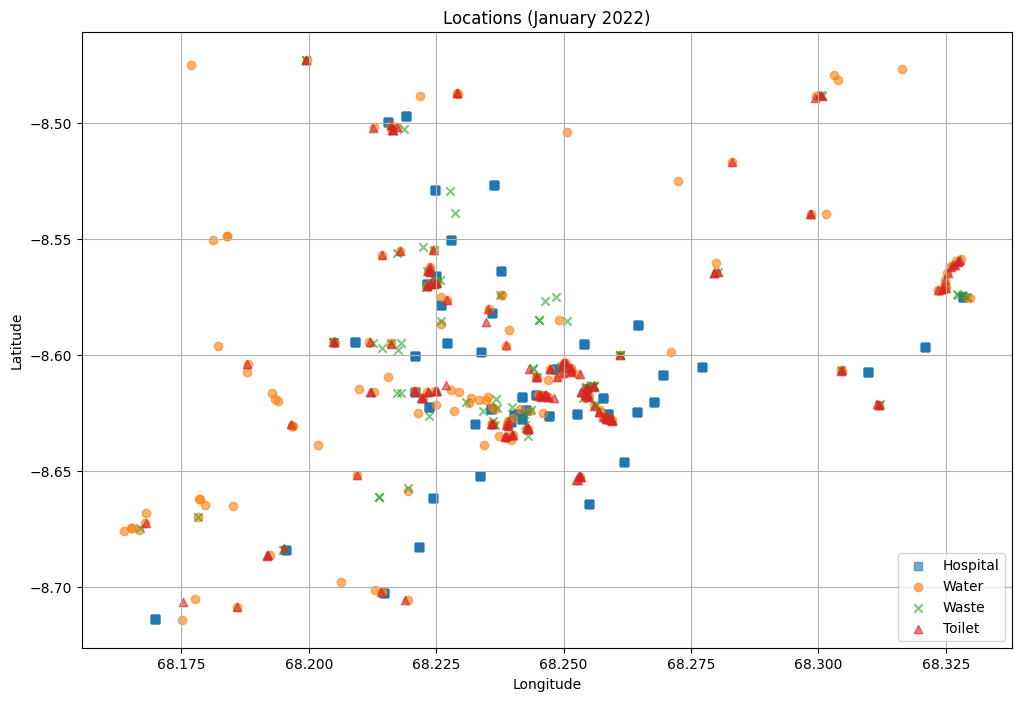

In [29]:
plot_locations()

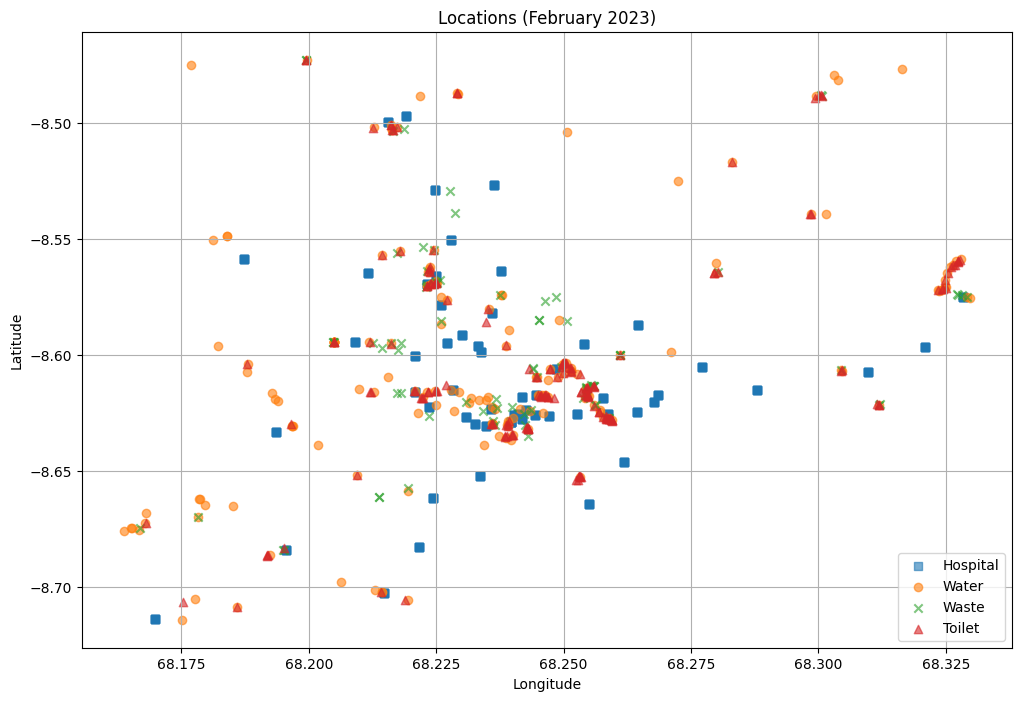

In [30]:
plot_locations(year=2023, month=2, month_name='February')

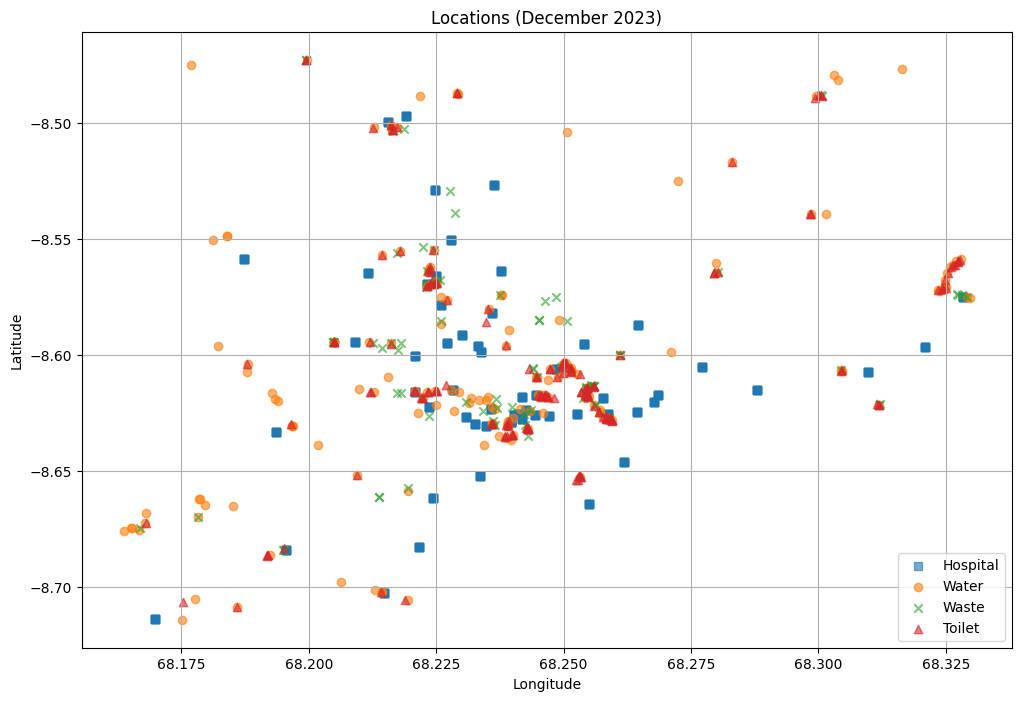

In [31]:
plot_locations(year=2023, month=12, month_name='December')

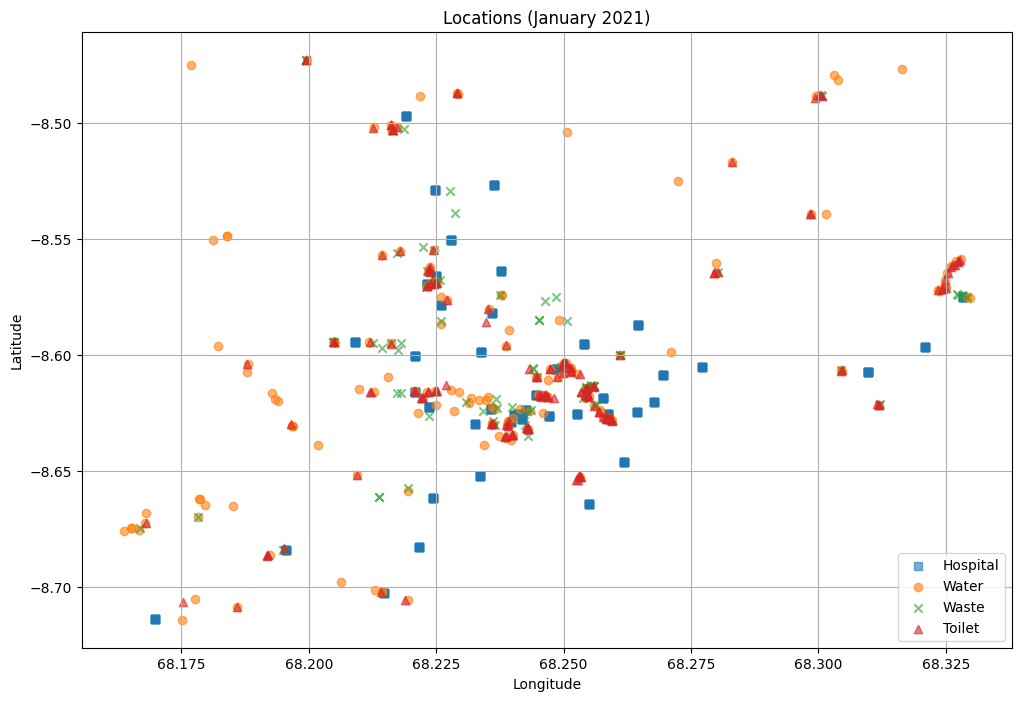

In [32]:
plot_locations(year=2021, month=1, month_name='January')

In [36]:
def find_nearest(hospital_df, location_df, lat_col, lon_col, id_col):
    # Create a cKDTree for efficient nearest neighbour search
    tree = cKDTree(location_df[[lat_col, lon_col]].values)
    nearest = {}
    # Loop through each hospital and find the nearest site in location_df
    for _, row in hospital_df.iterrows():
        _, idx = tree.query([row['Transformed_Latitude'], row['Transformed_Longitude']])
        nearest[row['ID']] = location_df.iloc[idx][id_col]
    return nearest


In [37]:
# Ensure unique identifier columns exist in all supplementary datasets
for df, prefix in [(toilets, 'toilet'), (waste_management, 'waste'), (water_sources, 'water')]:
    df[f"{prefix}_Month_Year_lat_lon"] = (
        df[f"{prefix}_Month_Year"] + '_' +
        df[f"{prefix}_Transformed_Latitude"].astype(str) + '_' +
        df[f"{prefix}_Transformed_Longitude"].astype(str)
    )

In [38]:
toilets.head()

,toilet_10u,toilet_10v,toilet_2d,toilet_2t,toilet_evabs,toilet_evaow,toilet_evatc,toilet_evavt,toilet_albedo,toilet_lshf,...,toilet_swvl1,toilet_swvl2,toilet_swvl3,toilet_swvl4,toilet_Transformed_Latitude,toilet_Transformed_Longitude,toilet_Month_Year,lat_lon,Month_Year_lat_lon,toilet_Month_Year_lat_lon
0,-1.006850,-0.714544,293.502,297.417,-0.002489,-0.001031,-0.000989,-3.445890e-08,0.173221,0.650001,...,0.346542,0.335724,0.264359,0.300018,-8.61768,68.24536,1_2019,-8.61768_68.24536,1_2019_-8.61768_68.24536,1_2019_-8.61768_68.24536
1,-1.408560,-0.662555,292.943,297.978,-0.002556,-0.001076,-0.000734,-3.818420e-08,0.173808,0.650001,...,0.254517,0.259918,0.281769,0.296188,-8.61768,68.24536,2_2019,-8.61768_68.24536,2_2019_-8.61768_68.24536,2_2019_-8.61768_68.24536
2,-0.892110,-0.449448,293.250,297.989,-0.002535,-0.000980,-0.000713,-3.678720e-08,0.178823,0.650001,...,0.278152,0.284195,0.261597,0.291672,-8.61768,68.24536,3_2019,-8.61768_68.24536,3_2019_-8.61768_68.24536,3_2019_-8.61768_68.24536
3,-0.392348,0.384925,293.934,296.542,-0.001748,-0.000658,-0.001343,-2.700840e-08,0.180959,0.650017,...,0.385513,0.378616,0.309784,0.288925,-8.61768,68.24536,4_2019,-8.61768_68.24536,4_2019_-8.61768_68.24536,4_2019_-8.61768_68.24536
4,-0.447104,0.581028,292.571,294.726,-0.001374,-0.000462,-0.001139,-2.048910e-08,0.182375,0.650009,...,0.397659,0.400055,0.392654,0.309311,-8.61768,68.24536,5_2019,-8.61768_68.24536,5_2019_-8.61768_68.24536,5_2019_-8.61768_68.24536


In [39]:
# Merge datasets with nearest locations
merged_data = hospital_data.copy()
datasets = [
    (toilets, 'toilet', 'toilet_Month_Year_lat_lon'),
    (waste_management, 'waste', 'waste_Month_Year_lat_lon'),
    (water_sources, 'water', 'water_Month_Year_lat_lon'),
]

In [40]:
for df, prefix, id_col in datasets:
    nearest = find_nearest(merged_data, df, f"{prefix}_Transformed_Latitude", f"{prefix}_Transformed_Longitude", id_col)
    nearest_df = pd.DataFrame(list(nearest.items()), columns=['ID', id_col])
    merged_data = merged_data.merge(nearest_df, on="ID").merge(df, on=id_col)

In [41]:
merged_data.shape

(22044, 135)

In [42]:
merged_data.head(2)

,ID,Total,Location,Category_Health_Facility_UUID,Disease,Month,Year,Transformed_Latitude,Transformed_Longitude,toilet_Month_Year_lat_lon,...,water_tp,water_swvl1,water_swvl2,water_swvl3,water_swvl4,water_Transformed_Latitude,water_Transformed_Longitude,water_Month_Year,lat_lon,Month_Year_lat_lon
0,ID_3a11929e-3317-476d-99f7-1bd9fb58f018_12_202...,0.0,ID_3a11929e-3317-476d-99f7-1bd9fb58f018,a9280aca-c872-46f5-ada7-4a7cc31cf6ec,Dysentery,12,2022,-8.62982,68.23267,4_2020_-8.62979_68.23582,...,0.002667,0.325867,0.325302,0.281708,0.24585,-8.62966,68.23589,12_2023,-8.62966_68.23589,12_2023_-8.62966_68.23589
1,ID_3a11929e-3317-476d-99f7-1bd9fb58f018_12_202...,0.0,ID_3a11929e-3317-476d-99f7-1bd9fb58f018,a9280aca-c872-46f5-ada7-4a7cc31cf6ec,Typhoid,12,2022,-8.62982,68.23267,4_2020_-8.62979_68.23582,...,0.002667,0.325867,0.325302,0.281708,0.24585,-8.62966,68.23589,12_2023,-8.62966_68.23589,12_2023_-8.62966_68.23589


## Start modeling

In [43]:
# Split merged data into train and test sets
train_df = merged_data[merged_data['Year'] < 2023]
test_df = merged_data[merged_data['Year'] == 2023]

In [44]:
# Specify the target column
target_column = 'Total'

# Feature and target split
X = train_df.drop(columns=[target_column, 'ID', 'Location'])  # Exclude unnecessary columns
y = train_df[target_column]

In [45]:
# Handle categorical features
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])


In [52]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# feature indices
categorical_features_indices = np.where(X.dtypes != np.float64)[0]

In [ ]:
# feature selection


In [88]:
# Initialize and train the regression model
# use catboost
model_cat = CatBoostRegressor(
    iterations=1000,         # Number of boosting iterations
    learning_rate=0.05,      # Step size for updates
    depth=6,                # Maximum tree depth
    cat_features=categorical_features_indices,  # Pass categorical feature indices
    verbose=100,            # Display training progress every 100 iterations
    random_state=42)
# model = RandomForestRegressor(random_state=42)
model_cat.fit(X_train, y_train)

0:	learn: 32.1707877	total: 48.5ms	remaining: 48.5s
100:	learn: 27.3951004	total: 5.75s	remaining: 51.2s
200:	learn: 26.9533511	total: 11.1s	remaining: 44.3s
300:	learn: 26.5724338	total: 17s	remaining: 39.4s
400:	learn: 26.1337234	total: 22.9s	remaining: 34.2s
500:	learn: 25.7150026	total: 28.6s	remaining: 28.5s
600:	learn: 25.2907702	total: 34.6s	remaining: 22.9s
700:	learn: 24.8902273	total: 40.4s	remaining: 17.2s
800:	learn: 24.5127952	total: 46.4s	remaining: 11.5s
900:	learn: 24.2917205	total: 52.3s	remaining: 5.74s
999:	learn: 23.9904694	total: 58.1s	remaining: 0us


In [91]:
# Make predictions
y_pred = model.predict(X_test)

In [90]:
y_pred

array([-0.69950822,  3.04471984, 11.34645092, ...,  9.97713221,
        9.02122053,  1.38615636])

In [87]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 11.45195067694681


#### Make predictions on test

In [75]:
# Prepare test data
X_test_final = test_df.drop(columns=['Total', 'ID', 'Location'], errors='ignore')

In [76]:
# Handle categorical features in test data
for col in categorical_cols:
    if col in X_test_final.columns:
        le = LabelEncoder()
        X_test_final[col] = le.fit_transform(X_test_final[col])

In [77]:
# Align test dataset with training features
for col in X.columns:
    if col not in X_test_final.columns:
        X_test_final[col] = 0  # Add missing feature with default value (e.g., zero)


In [78]:
# Ensure columns are in the same order as training
X_test_final = X_test_final[X.columns]

In [79]:
# Make predictions on test data
predictions = model.predict(X_test_final)

In [80]:
# Create the final DataFrame with ID and predictions
sub = test_df[['ID']].copy()
sub['Predicted_Total'] = predictions

In [81]:
# View the first few records in sub
sub.head()

,ID,Predicted_Total
17172,ID_00cd8292-dd85-4fa3-8148-9592e88a1651_1_2023...,18.258596
17173,ID_00cd8292-dd85-4fa3-8148-9592e88a1651_2_2023...,11.619504
17174,ID_00cd8292-dd85-4fa3-8148-9592e88a1651_3_2023...,10.405140
17175,ID_00cd8292-dd85-4fa3-8148-9592e88a1651_4_2023...,8.375777
17176,ID_00cd8292-dd85-4fa3-8148-9592e88a1651_5_2023...,7.297534


In [82]:
# Save the final DataFrame to a CSV
sub.to_csv('Benchmark.csv', index=False)